# Random Forest Regression

The obvious next question is, can we use machine learning to determine a way to get the best possible scores. Our goal is to replace the code that defines the Perfect VP with an algorithm that gives the best scores achievable in real life. First, we are going to have to solve the game. One way to do this is with a Random Forest.

Predictive models, like Random Forest, can be used to map a set of variables (or features) to a predicted result. In our case, the features will be the same equations that our Perfect VP will use after we update it. This will make more sense after you see the data we will use. 

From station.py, run menu item #5. It will take some time to generate all the samples. It has to randomly generate sets of coefficients \[COE\], then run the Boxcar simulator 8000 times for each to get it's mean score. The resulting csv will contain each \[COE\] tested along with it's mean score:

In [ ]:
# The resulting csv ('data/gen_data.csv') will contain each [COE] 
# tested along with it's mean score:
[1], [2], [3], [4], [5], [0], [mean_score]
50, 1050, 800, 650, 850, 2100, 422

# The Coefficients represent a score threshold for each number of
# dice in play. In the example above, the VP would choose to roll 
# with 4 dice in play only if the score for that round was under 
# 650 points. Any VP using these coefficients would be expected 
# to get a mean score of 422

We will be building many random forest models with different hyper-parameters, then selecting the one that does the best. First lets import some modules and prepare our data.

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Reading data into a pandas dataframe.
X_data = pd.read_csv('../data/gen_data.csv', names=[1,2,3,4,5,6,'score'])

# The score column is the result. This needs to be separated.
y_data = X_data.pop('score')

# We need to separate our data again into one set to TRAIN our model,
# and a second set to TEST how well the model works.
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=.5, shuffle=True)

Next we will build and score models while adjusting the max depth hyper-parameter. Each model will give us two scores--one based on it's accuracy when predicting the TRAINING data, and one based on it's accuracy when predicting the TEST data. Let's record them both.

In [39]:
# There are many ways to affect the random forest classifier.
# Here, we are setting Max Depth to various lengths, and recording
# the score of the model for each.
max_depth_list = range(5,21, 1)
training_scores = []
test_scores = []

for max_depth in max_depth_list:
    
    # Create model...
    model = RandomForestRegressor(
        # estimators will easily over-fit the model
        n_estimators = 100,
        # Max Depth limits the effectiveness of the estimators.
        max_depth = max_depth,
        # n_jobs =-1 uses all of your processors. Remove if crashing.
        n_jobs=-1)
    
    # Train model using the training data set we set aside above
    model.fit(X_train, y_train)
    
    # Training score is how well the model predicts the training data
    training_scores.append(model.score(X_train, y_train))
    
    # Test score is how well it predicts the test data.
    # This is the real test of how well a predictive model works
    test_scores.append(model.score(X_test, y_test))


The cell above trains random forest models on our training set

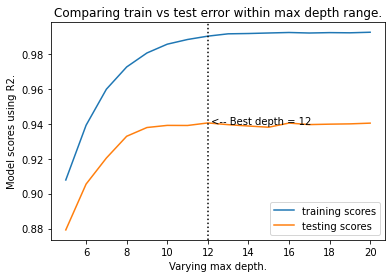

In [40]:
# By plotting the scores of the model for both the train and test
# data sets, we can see something very interesting happen!

# This line creates a matplotlib figure and axes: We will use these
# objects to plot our graph.
fig, ax = plt.subplots()    

# sns.lineplot draws lines on the axes according to the data given
# In this case, we are giving it the max depth and scores from 
# the cell above. 
ax = sns.lineplot(max_depth_list, training_scores, label='training scores')
ax = sns.lineplot(max_depth_list, test_scores, label='testing scores')

# The best depth is the one that creates the best test score.
best_depth = max_depth_list[test_scores.index(max(test_scores))]

# Adding information to the graph...
ax.axvline(best_depth, linestyle=':', color = 'k')
ax.text(best_depth, .94, f' <-- Best depth = {best_depth}')
plt.title('Comparing train vs test error within max depth range.')
plt.xlabel('Varying max depth.')
plt.ylabel('Model scores using R2.')

# Saving figure in the images folder
plt.savefig('../images/rf_test.png')

A random forest regressor is prone to overfitting. In the graph above, you can see that increasing the max depth will continue to improve the training score seemingly to infinity. The problem with this is that we don't actually care about predicting the training data set (we already have results from it!). Instead, we want to be able to predict on data that the model has never seen. Our testing scores represent this data, and the testing score moreso indicates our model's ability.

It might be hard to tell from the graph, but the test score of your model will start to fall after a certain point, while the training score keeps going up. We want to use the max depth where the test score is the highest. We can expect any other max depth to give less than optimal predictions in the future.

How well did your first model do? My guess is, the line for testing scores is scraggily and your best depth changes drastically each time you run this notebook. See if you can find a way to get better results. You should be able to get the test score up to .975 after running the simulator a few more times (a bigger sample size always gives better results). What else can you think of to try?

In [45]:
# After you find the best hyper-parameters to use, train your
# final model here.
final_model = RandomForestRegressor(
            #add optimal hyper-parameters here
)
    
# Train model using the training data set we set aside above
model.fit(X_train, y_train)

# Your model is now ready to make predictions!
# This script will tell you the predicted mean score of any COE. 
model.predict(pd.DataFrame({1:100, 2:200, 3:500, 4:800, 5:1000, 6:1500}))

# Once you find a COE that is really 
# good, make a VP out of it-- then go back to chapter 2 and test 
# it against the others!


ValueError: If using all scalar values, you must pass an index